In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import os
%matplotlib inline

In [3]:
#Import data sets
#fil_nam=os.listdir("data") # name of all files in the folder data in the current working directory
tra_set = pd.read_excel(r'titanic_traning.xlsx')
tes_set = pd.read_excel(r'titanic_test.xlsx')

#Show the head of data
print("Train set's head: \n",tra_set.head())
print("Test set's head: \n",tes_set.head())

Train set's head: 
    ID  pclass  gender   age  sibsp  parch  fare embarked  survived
0   1       3    male  20.0      0      0   4.0        C         0
1   2       3  female  18.0      0      0   7.2        C         1
2   3       2    male   NaN      0      0  15.6        C         0
3   4       2    male   NaN      0      0   0.0        S         0
4   5       3  female   2.0      3      2  27.9        S         0
Test set's head: 
     ID  pclass  gender   age  sibsp  parch   fare embarked
0  917       1  female  29.0      0      0  211.3        S
1  918       1  female  25.0      1      2  151.6        S
2  919       1  female  63.0      1      0   78.0        S
3  920       1    male  39.0      0      0    0.0        S
4  921       1  female  53.0      2      0   51.5        S


### Understand the data

In [4]:
# Check basic information of the feature
def bas_inf(feat):
    print(feat.head())
    print(len(feat)) #length of data
    #See unique values
    print(pd.unique(feat))
    # Display histogram of feature
    feat.value_counts().plot('bar')
    #check whether there is missing data
    if np.any(feat.isnull())==False:
        if feat.dtypes !='O':
            print(np.mean(feat))
            print(np.std(feat))
            print(np.median(feat))
        
    
 


0    0
1    0
2    0
3    0
4    3
Name: sibsp, dtype: int64
916
[0 3 1 2 5 8 4]
0.5218340611353712
1.0981143617600069
0.0


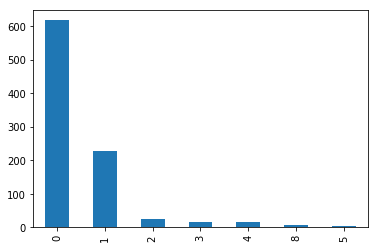

In [5]:
bas_inf(tra_set['sibsp'])

#### Fill the missing data

In [6]:
tra_set=tra_set.fillna(method='ffill')


### Algorithm OneR function

In [22]:
def oneR(fea_nam):
    # Use the loop to apply algorithm on each type of features
    vc=pd.Series([0,0])
    for typ in tra_set[fea_nam].unique():
        sss=tra_set['survived'][tra_set[fea_nam]==typ] # subset of survived status of this type
        vc=sss.value_counts()
        print(vc)
        print('If',fea_nam,' is ', typ)
        maj=np.argmax(vc) # find the majority survived status
        print('The majority survived status is',maj)
        #Assign the majority status onto this type of test set
        tes_set['survived'][tes_set[fea_nam]==typ]=maj
    return tes_set['survived']
    #print(tes_set['survived'])

In [23]:
tes_set['survived']=np.nan
pre_fn='titanic_test_predictions.xlsx'
featn1='pclass'
pre1=oneR(featn1)
ws_nam1=featn1+'_Based_Prediction'
featn2='sibsp'
pre2=oneR(featn2)
ws_nam2=featn2+'_Based_Prediction'

book = load_workbook(pre_fn) # Save existing data into book
writer = pd.ExcelWriter(pre_fn, engine='openpyxl') 
writer.book = book
writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

pre1.to_excel(writer, sheet_name=ws_nam1,index=False,header=False,startcol=2,startrow=1)
pre2.to_excel(writer, sheet_name=ws_nam2,index=False,header=False,startcol=2,startrow=1)

writer.save()


0    367
1    128
Name: survived, dtype: int64
If pclass  is  3
The majority survived status is 0
0    116
1     89
Name: survived, dtype: int64
If pclass  is  2
The majority survived status is 0
1    136
0     80
Name: survived, dtype: int64
If pclass  is  1
The majority survived status is 1
0    405
1    212
Name: survived, dtype: int64
If sibsp  is  0
The majority survived status is 0
0    10
1     6
Name: survived, dtype: int64
If sibsp  is  3
The majority survived status is 0


C:\Users\Duong Hung\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    121
0    108
Name: survived, dtype: int64
If sibsp  is  1
The majority survived status is 1
0    15
1    11
Name: survived, dtype: int64
If sibsp  is  2
The majority survived status is 0
0    5
Name: survived, dtype: int64
If sibsp  is  5
The majority survived status is 0
0    8
Name: survived, dtype: int64
If sibsp  is  8
The majority survived status is 0
0    12
1     3
Name: survived, dtype: int64
If sibsp  is  4
The majority survived status is 0


In [ ]:
'gender'+'_based'

In [ ]:
tra_set['gender'].unique()

In [ ]:
tes_set